In [4]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=33c846f795fceab85490f8c02ad2d00d80f9c905f122b090ad437f244683c58e
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [7]:
!pip install to_categorical

ERROR: Could not find a version that satisfies the requirement to_categorical (from versions: none)
ERROR: No matching distribution found for to_categorical


In [5]:
!pip install split_folders

In [8]:
from tensorflow.keras.utils import to_categorical

In [10]:
from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *

gpu_check()
set_global_determinism(seed=SEED)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3851869317338783882
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11345264640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8278803648453219713
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
tf 2.6.0
keras 2.6.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
set_global_determinism(seed=1337)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

file_list = os.listdir("C:\\Users\\yukir\\Documents\\Monicas_workspace\\Datasets\\cleaned_raw_data")
file_list = file_list[1:]
print(file_list)

['fragile', 'handle', 'up', 'wet']


## Dataload

In [13]:
data_path ='/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/'
a = get_file_list(data_path)
a

['/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test',
 '/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train']

In [14]:
from sklearn.preprocessing import label_binarize
categories = ['fragile', 'handle', 'up', 'wet']


In [ ]:
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_1.jpg

In [21]:
SIZE = 200  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob(data_path+'train/*'):
    label = directory_path.split("/")[-1]
    # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print(len(train_images))
print(len(train_labels))

/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_56.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_147.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_141.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_110.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_91.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_150.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_55.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_66.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_21.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_122.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/train/fragile/fragile_1

In [23]:
# Capture test/validation data and labels into respective lists

SIZE = 200  #Resize images

#Capture training data and labels into respective lists
test_images = []
test_labels = [] 

for directory_path in glob.glob(data_path+'test/*'):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays        
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print(len(test_images))
print(len(test_labels))

fragile
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_33.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_116.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_1.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_62.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_94.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_118.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_162.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_19.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_156.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_41.jpg
/content/drive/MyDrive/Sign Detection/Datasets/Stratified_new/test/fragile/fragile_97.jpg

In [24]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [25]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [26]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
#딥러닝으로 들어갈때는 원핫으로 들어가야함

from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [33]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [34]:
#Load model wothout classifier/fully connected layers
SIZE = 200
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
______________________________________________________________

In [35]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train = features #This is our X input to RF

In [36]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_train, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
# print(prediction_RF)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)
# print(prediction_RF)

In [37]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.972972972972973


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


              precision    recall  f1-score   support

     fragile       0.97      0.97      0.97        34
      handle       1.00      0.91      0.95        22
          up       0.93      1.00      0.97        28
         wet       1.00      1.00      1.00        27

    accuracy                           0.97       111
   macro avg       0.98      0.97      0.97       111
weighted avg       0.97      0.97      0.97       111



findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


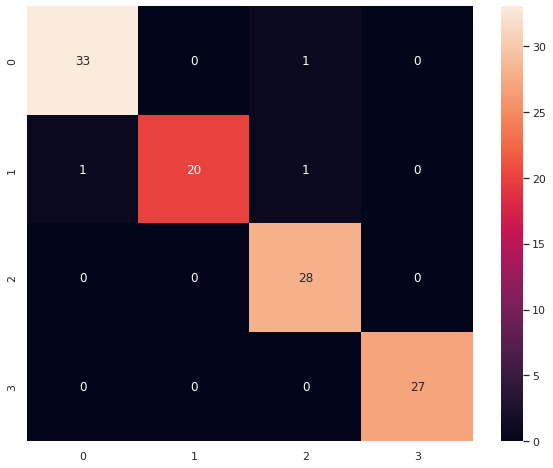

In [38]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
report = classification_report(test_labels, prediction_RF)
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
print(report)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['fragile']
The actual label for this image is:  fragile


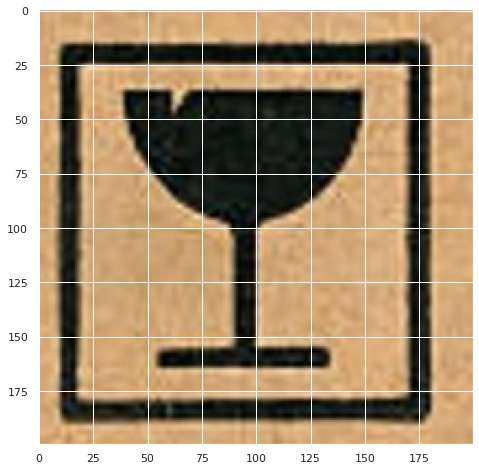

In [39]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])



## Save model

In [ ]:
import joblib
joblib.dump(RF_model, '0924_RF_model_96.pkl')

['0924_RF_model_96.pkl']

## Model Evaluation

In [40]:
#evaluation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


In [ ]:
y_score = RF_model.fit(X_train, y_train).predict_proba(X_test_features)
y_score

In [42]:
y = label_binarize(test_labels_encoded, classes=[0, 1, 2, 3])
y[0]

array([1, 0, 0, 0])

In [44]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [45]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [46]:
from itertools import cycle

In [47]:
n_classes = 4

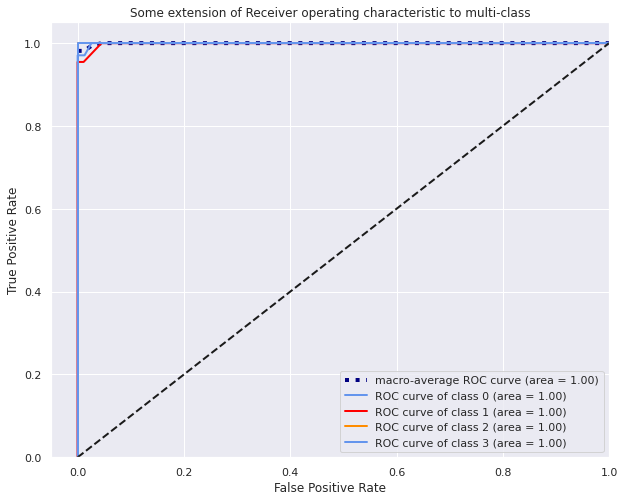

In [48]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
lw = 2
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['cornflowerblue', 'red', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#### Precision and Recall curve

In [77]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_one_hot[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_one_hot[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_one_hot.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test_one_hot, y_score, average="micro")

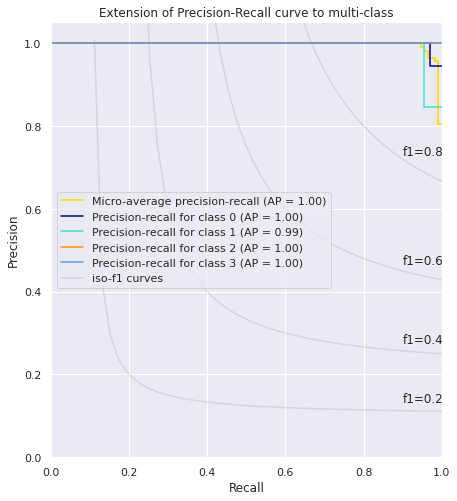

In [88]:
import matplotlib.pyplot as plt
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=0.9969583665476998,
    estimator_name ='RF'
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
        estimator_name ='rf'
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()